## 8.2 TensorFlow and Keras

- Installing Tensorflow
- Loading images

https://www.datacamp.com/tutorial/pytorch-vs-tensorflow-vs-keras
https://www.analyticsvidhya.com/blog/2021/11/training-neural-network-with-keras-and-basics-of-deep-learning/
https://blog.tensorflow.org/2018/08/training-and-serving-ml-models-with-tf-keras.html

In [41]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [42]:
from tensorflow.keras.preprocessing.image import load_img

In [43]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'

In [46]:
img = load_img(fullname, target_size=(150, 150))

In [47]:
print(img)

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F3DE22ED7F0>


Put image into numpy array

In [48]:
x = np.array(img)
x.shape

(150, 150, 3)

## 8.3 Pre-trained convolutional neural networks

- Imagenet dataset: https://image-net.org/about.php
- Pre-trained models: https://keras.io/api/applications/

In [50]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input # for prepared our data
from tensorflow.keras.applications.xception import decode_predictions

In [52]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [53]:
X = np.array([x])

In [54]:
X.shape

(1, 150, 150, 3)

Preprocess

In [55]:
X = preprocess_input(X)
X

array([[[[ 0.38823533,  0.3176471 , -0.2235294 ],
         [ 0.39607847,  0.32549024, -0.21568626],
         [ 0.427451  ,  0.35686278, -0.18431371],
         ...,
         [ 0.96862745,  0.9843137 ,  0.9607843 ],
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.9843137 ,  0.94509804]],

        [[ 0.5686275 ,  0.4901961 ,  0.01176476],
         [ 0.5921569 ,  0.5137255 ,  0.03529418],
         [ 0.5921569 ,  0.5137255 ,  0.03529418],
         ...,
         [ 0.9607843 ,  0.96862745,  0.92941177],
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863]],

        [[ 0.5686275 ,  0.48235297,  0.04313731],
         [ 0.5921569 ,  0.5058824 ,  0.06666672],
         [ 0.58431375,  0.49803925,  0.05882359],
         ...,
         [ 0.96862745,  0.9607843 ,  0.92156863],
         [ 0.9607843 ,  0.9607843 ,  0.8980392 ],
         [ 0.9529412 ,  0.9529412 ,  0.8745098 ]],

        ...,

        [[ 0.3411765 ,  0.2313726 , -0

#### Use our model

In [56]:
pred = model.predict(X)
pred

ValueError: in user code:

    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "xception" is incompatible with the layer: expected shape=(None, 299, 299, 3), found shape=(None, 150, 150, 3)


In [31]:
pred.shape

(1, 1000)

#### Decode predictions. This module look at predictions and make it human readible 

In [32]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

### 8.4 Convolutional neural networks

- Types of layers: convolutional and dense
- Convolutional layers and filters 
- Dense layers

Additional links: 
-  https://cs231n.github.io/
- https://poloclub.github.io/cnn-explainer/
- https://connectjaya.com/classical-convolutional-neural-networkscnn/
- https://saturncloud.io/blog/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way/

### 8.5 Transfer Learning

- Reading data with ImageDataGenerator
- Train Xception on smaller images (150x150)

(Better to run it with a GPU)

In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import tensorflow as tf
from tensorflow import keras

import numpy as np
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input # for prepared our data
from tensorflow.keras.applications.xception import decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [90]:
# Build image generator for training (takes preprocessing input function)
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load in train dataset into train generator
train_ds = train_gen.flow_from_directory(directory='./clothing-dataset-small/train', # Train images directory
                                         target_size=(150,150), # resize images to train faster
                                         batch_size=32) # 32 images per batch

# Create image generator for validation
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load in image for validation
val_ds = val_gen.flow_from_directory(directory='./clothing-dataset-small/validation', # Validation image directory
                                     target_size=(150,150),
                                     batch_size=32,
                                     shuffle=False) # False for validation

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


### Train a model

**"include_top = False" - means that we want take only Convolutional Layers**

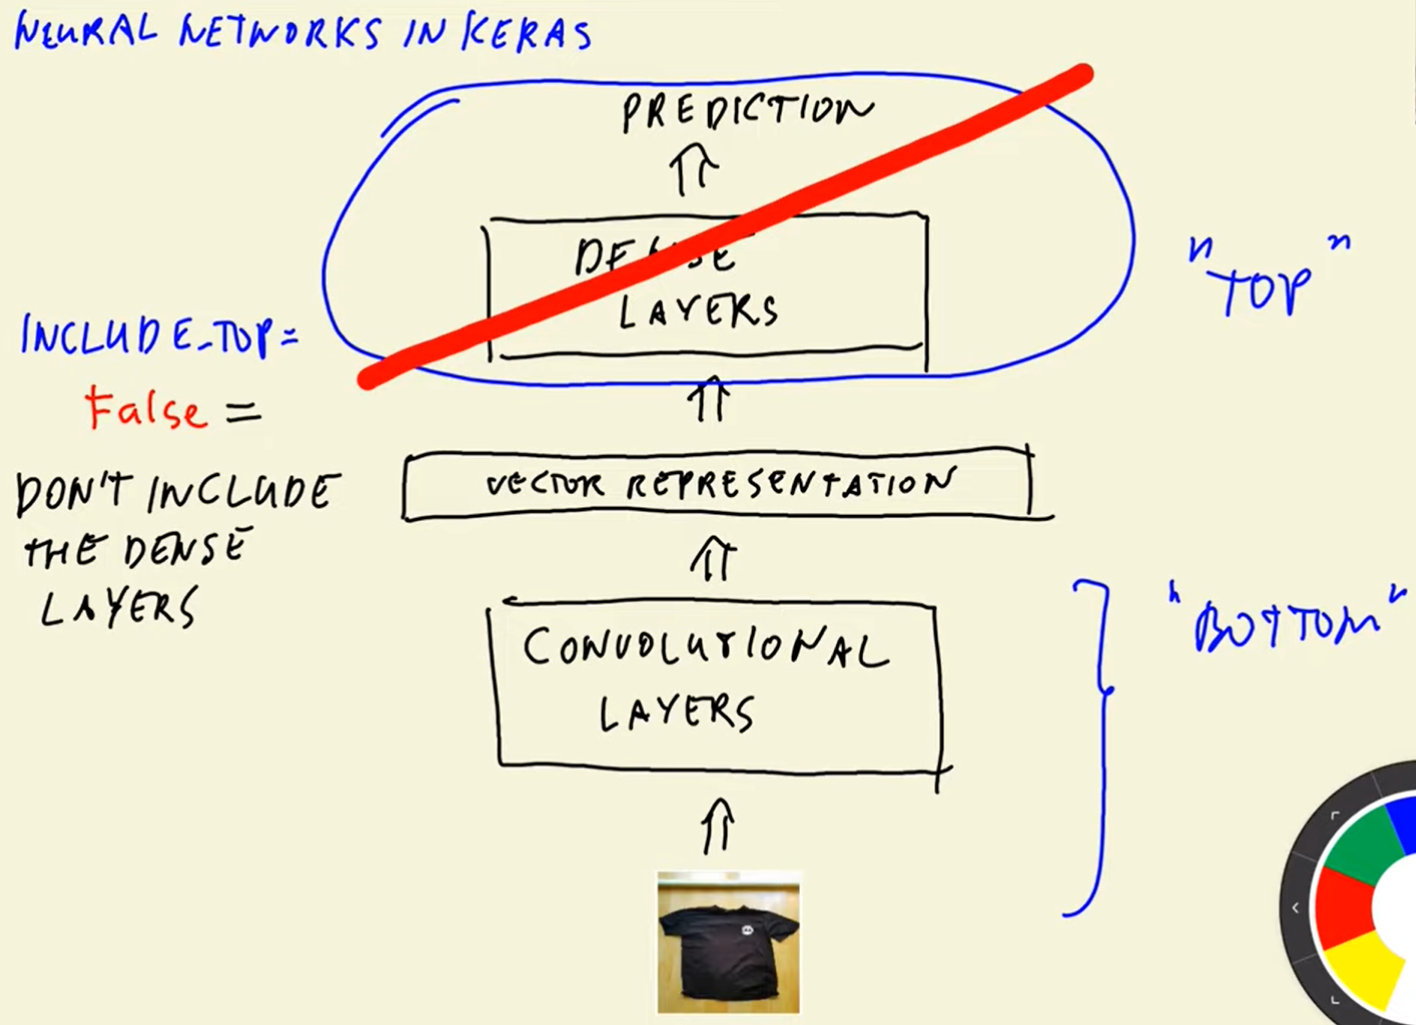

"trainable = False" - it means that we don't want to train this model, we only want use it to extract a Vector Representation

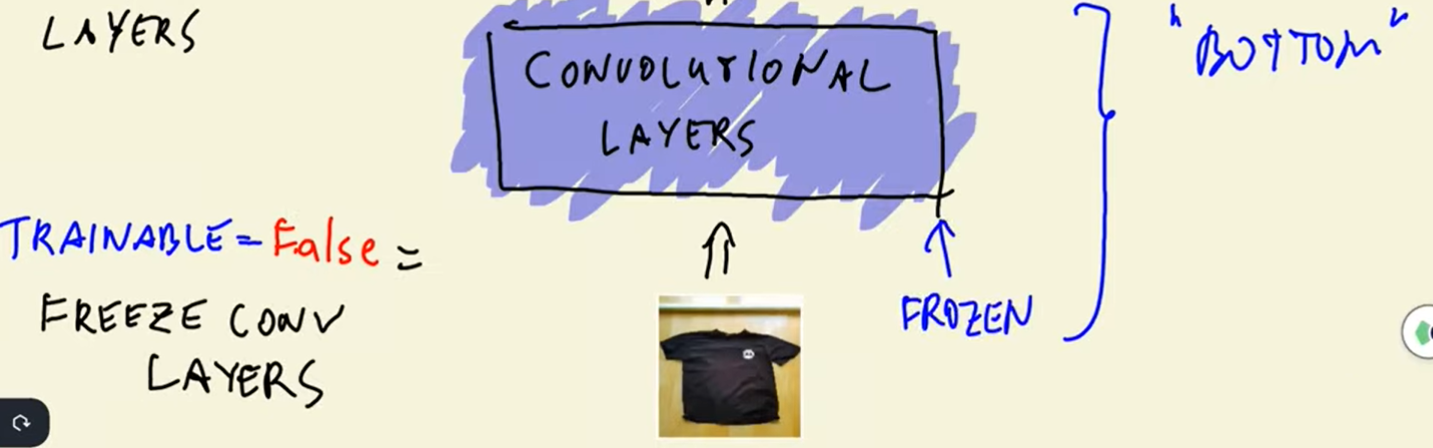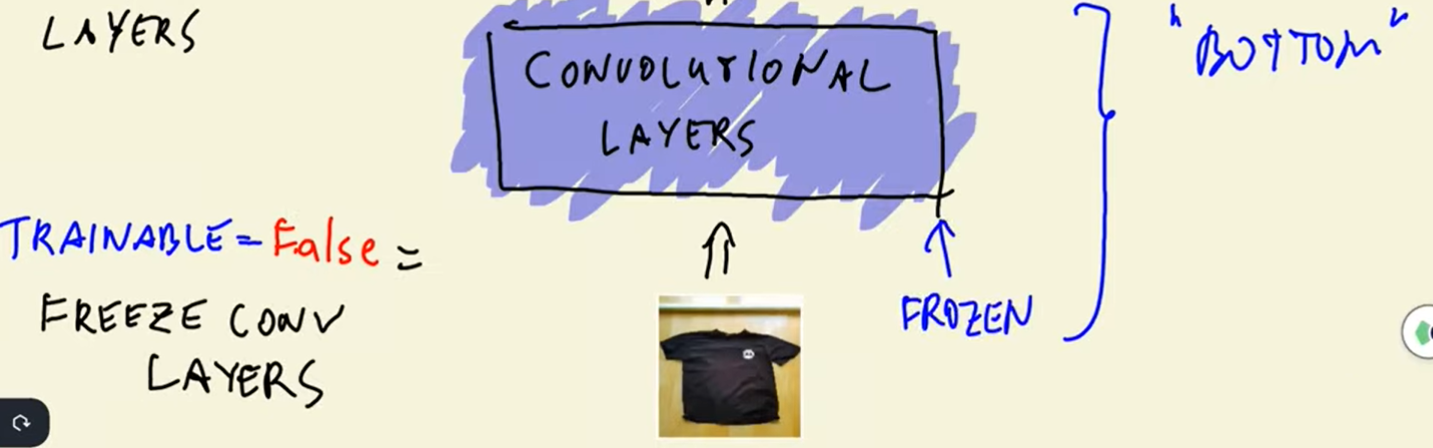

In [91]:
# Build base model
base_model = Xception(weights='imagenet',
                      include_top=False, # to create custom dense layer
                      input_shape=(150,150,3))

# Freeze the convolutional base by preventing the weights being updated during training
base_model.trainable = False

# Define expected image shape as input
inputs = keras.Input(shape=(150,150,3))

# Feed inputs to the base model
base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer

# Convert matrices into vectors using pooling layer
vectors = keras.layers.GlobalAveragePooling2D()(base)

# Create dense layer of 10 classes
outputs = keras.layers.Dense(10)(vectors)

# Create model for training
model = keras.Model(inputs, outputs)

In [92]:
preds = model.predict(X)

1/1 [==============================] - 1s 672ms/step


In [93]:
preds.shape

(32, 10)

In [94]:
preds

array([[ 2.46643811e-01, -1.91319972e-01,  2.89160430e-01,
        -8.89070392e-01,  1.57348841e-01,  8.06095123e-01,
         2.86180794e-01,  6.28556252e-01,  5.64349815e-02,
         3.63101125e-01],
       [ 1.05231762e+00,  9.35590386e-01,  7.94545591e-01,
        -4.61044610e-01,  7.51285315e-01,  1.06321728e+00,
         2.29679286e-01, -1.55475512e-01,  6.03538156e-02,
        -4.05130863e-01],
       [ 6.57237768e-01,  9.80380177e-03,  8.65712017e-02,
        -1.68769920e+00, -5.63937187e-01,  4.57952648e-01,
         2.09235382e+00, -7.91791797e-01, -5.20814717e-01,
        -5.74947298e-01],
       [-1.26350909e-01, -2.77945966e-01, -6.45452380e-01,
        -6.86014891e-01,  3.43291730e-01, -7.19301224e-01,
        -4.88908261e-01, -8.84933710e-01,  4.88541424e-02,
         5.16656458e-01],
       [-4.58642840e-01,  4.14682984e-01,  2.59105086e-01,
         1.36542544e-01,  7.06998348e-01, -1.35154545e+00,
         8.28890681e-01,  5.41382372e-01, -2.45680541e-01,
         1.

We get just random numbers. That's because we didn't train a model. Let's do that. 

And in order to do that first of all we need to use **Optimizer** - it's a thing which finds the best weight for our model

In [95]:
# Define learning rate
learning_rate = 0.01

# Create optimizer
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# Define loss function
loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without applying softmax

# Compile the model
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy']) # evaluation metric accuracy

We're ready to train a model

In [96]:
# Train the model, validate it with validation data, and save the training history
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 15s 131ms/step - loss: 1.2851 - accuracy: 0.6617 - val_loss: 0.7667 - val_accuracy: 0.7830
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 0.5376 - accuracy: 0.8292 - val_loss: 0.8863 - val_accuracy: 0.8006
Epoch 3/10
96/96 [==============================] - 12s 123ms/step - loss: 0.3675 - accuracy: 0.8729 - val_loss: 0.9786 - val_accuracy: 0.7859
Epoch 4/10
96/96 [==============================] - 12s 125ms/step - loss: 0.2410 - accuracy: 0.9140 - val_loss: 0.9121 - val_accuracy: 0.7947
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.1550 - accuracy: 0.9469 - val_loss: 0.8338 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.1389 - accuracy: 0.9498 - val_loss: 0.9443 - val_accuracy: 0.8123
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.1076 - accuracy: 0.9586 - val_loss: 0.9853 - val_accuracy: 0.8006

How look at accuracy

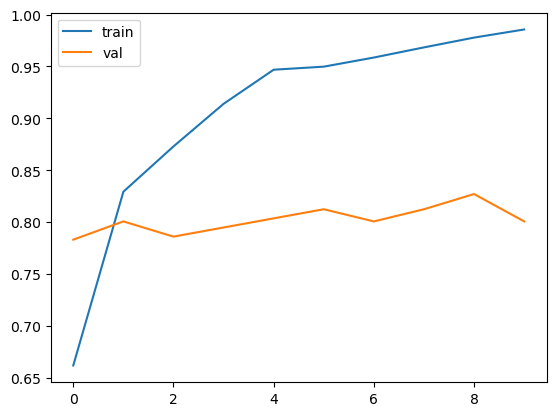

In [97]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'val')
         
plt.legend()

### 8.6 Adjusting the learning rate

- What's the Learning Rate
- Trying different values

#### Set base function for making a model

In [98]:
def make_model(learning_rate=0.01):
    base_model = Xception(weights='imagenet',
                  include_top=False, # to create custom dense layer
                  input_shape=(150,150,3))

    base_model.trainable = False
    
    ########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #######################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without applying softmax

    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy']) # evaluation metric accuracy
    return model

#### Itterate over different values of Learning Rate

In [99]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 16s 138ms/step - loss: 2.0356 - accuracy: 0.3178 - val_loss: 1.6998 - val_accuracy: 0.4721
Epoch 2/10
96/96 [==============================] - 12s 128ms/step - loss: 1.4312 - accuracy: 0.5570 - val_loss: 1.3014 - val_accuracy: 0.5982
Epoch 3/10
96/96 [==============================] - 12s 129ms/step - loss: 1.1605 - accuracy: 0.6379 - val_loss: 1.0964 - val_accuracy: 0.6481
Epoch 4/10
96/96 [==============================] - 13s 130ms/step - loss: 1.0121 - accuracy: 0.6838 - val_loss: 0.9770 - val_accuracy: 0.6979
Epoch 5/10
96/96 [==============================] - 12s 129ms/step - loss: 0.9154 - accuracy: 0.7099 - val_loss: 0.8968 - val_accuracy: 0.7243
Epoch 6/10
96/96 [==============================] - 13s 130ms/step - loss: 0.8463 - accuracy: 0.7288 - val_loss: 0.8370 - val_accuracy: 0.7566
Epoch 7/10
96/96 [==============================] - 12s 128ms/step - loss: 0.7936 - accuracy: 0.7419 - val_loss: 0.7979 - val_accuracy:

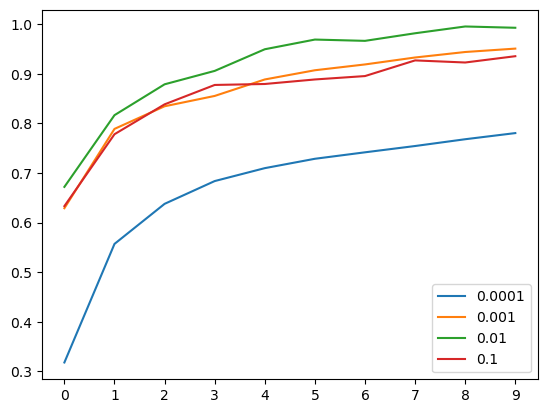

In [103]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=lr)
             
plt.xticks(np.arange(10))
plt.legend()

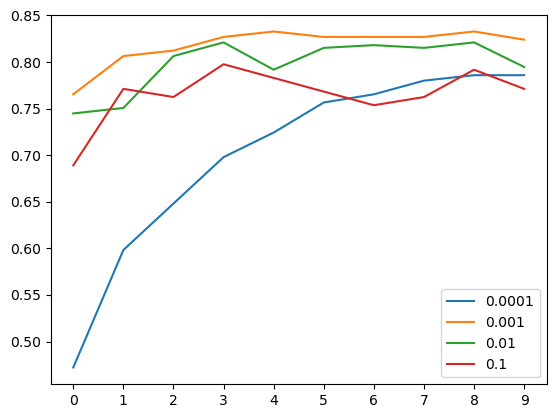

In [105]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
             
plt.xticks(np.arange(10))
plt.legend()

### Selecting the best Learning Rate

In [106]:
learning_rate = 0.001

### 8.7 Checkpointing
- Saving the best model only 
- Training a model with callbacks

##### Keras template for saving files

In [107]:
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=12, val_accuracy=0.824234)

'xception_v1_12_0.824.h5'

In [110]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max')

In [111]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - 16s 142ms/step - loss: 1.0767 - accuracy: 0.6441 - val_loss: 0.7030 - val_accuracy: 0.7859
Epoch 2/10
96/96 [==============================] - 13s 132ms/step - loss: 0.6199 - accuracy: 0.7901 - val_loss: 0.6201 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 13s 130ms/step - loss: 0.5055 - accuracy: 0.8321 - val_loss: 0.6126 - val_accuracy: 0.7918
Epoch 4/10
96/96 [==============================] - 13s 133ms/step - loss: 0.4303 - accuracy: 0.8641 - val_loss: 0.5635 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 12s 130ms/step - loss: 0.3651 - accuracy: 0.8849 - val_loss: 0.5351 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 13s 131ms/step - loss: 0.3280 - accuracy: 0.9009 - val_loss: 0.5333 - val_accuracy: 0.8182
Epoch 7/10
96/96 [==============================] - 12s 128ms/step - loss: 0.2884 - accuracy: 0.9188 - val_loss: 0.5505 - val_accuracy: 0.8065

### 8.8 Adding more layers

- Adding one inner dense layer 
- Experimenting with different sizes of inner layer

In [113]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(weights='imagenet',
                  include_top=False, # to create custom dense layer
                  input_shape=(150,150,3))

    base_model.trainable = False
    
    ########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) # adding additional Dense Layer
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #######################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without applying softmax

    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy']) # evaluation metric accuracy
    return model

#### Tunning inner_layer size parameter

In [114]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 16s 140ms/step - loss: 1.3472 - accuracy: 0.5694 - val_loss: 0.9675 - val_accuracy: 0.6862
Epoch 2/10
96/96 [==============================] - 13s 130ms/step - loss: 0.8283 - accuracy: 0.7177 - val_loss: 0.8044 - val_accuracy: 0.7331
Epoch 3/10
96/96 [==============================] - 12s 129ms/step - loss: 0.6712 - accuracy: 0.7744 - val_loss: 0.7161 - val_accuracy: 0.7713
Epoch 4/10
96/96 [==============================] - 12s 127ms/step - loss: 0.5745 - accuracy: 0.8136 - val_loss: 0.6969 - val_accuracy: 0.7654
Epoch 5/10
96/96 [==============================] - 12s 129ms/step - loss: 0.4959 - accuracy: 0.8422 - val_loss: 0.6530 - val_accuracy: 0.7977
Epoch 6/10
96/96 [==============================] - 12s 128ms/step - loss: 0.4363 - accuracy: 0.8680 - val_loss: 0.6423 - val_accuracy: 0.7801
Epoch 7/10
96/96 [==============================] - 12s 129ms/step - loss: 0.3908 - accuracy: 0.8807 - val_loss: 0.6252 - val_accuracy: 0.7

In [115]:
scores

{10: {'loss': [1.347235918045044,
   0.8283031582832336,
   0.6712259650230408,
   0.5744540691375732,
   0.4959162175655365,
   0.436339408159256,
   0.39082399010658264,
   0.3427981436252594,
   0.3102053999900818,
   0.2790050506591797],
  'accuracy': [0.5694263577461243,
   0.7177314162254333,
   0.7744458913803101,
   0.8135592937469482,
   0.8422424793243408,
   0.8679921627044678,
   0.8807040452957153,
   0.9035202264785767,
   0.9071056246757507,
   0.9227509498596191],
  'val_loss': [0.9674548506736755,
   0.8044314384460449,
   0.7160677909851074,
   0.6969375610351562,
   0.653007447719574,
   0.6422780156135559,
   0.625176727771759,
   0.631043553352356,
   0.6271810531616211,
   0.6330587863922119],
  'val_accuracy': [0.6862170100212097,
   0.733137845993042,
   0.7712609767913818,
   0.7653958797454834,
   0.7976539731025696,
   0.7800586223602295,
   0.7947214245796204,
   0.7947214245796204,
   0.7859237790107727,
   0.7888563275337219]},
 100: {'loss': [0.9957823157

#### Let's plot it

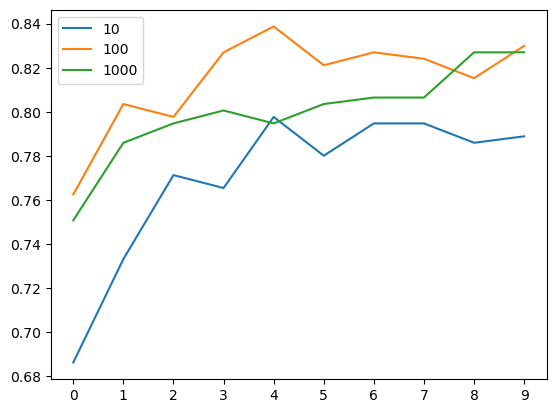

In [116]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=size)
             
plt.xticks(np.arange(10))
plt.legend()

### 8.9 Regularization and dropout
- Regularizating by freezing a part of the network
- Adding dropout to our model 
- Experimenting with different values

In [119]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet',
                  include_top=False, # to create custom dense layer
                  input_shape=(150,150,3))

    base_model.trainable = False
    
    ########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) # adding additional Dense Layer
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #######################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without applying softmax

    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy']) # evaluation metric accuracy
    return model

In [120]:
learning_rate = 0.001
size = 100
scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
    
    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )
    
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 16s 139ms/step - loss: 0.9434 - accuracy: 0.6763 - val_loss: 0.6384 - val_accuracy: 0.7889
Epoch 2/30
96/96 [==============================] - 12s 128ms/step - loss: 0.4972 - accuracy: 0.8224 - val_loss: 0.6000 - val_accuracy: 0.8035
Epoch 3/30
96/96 [==============================] - 12s 127ms/step - loss: 0.3423 - accuracy: 0.8814 - val_loss: 0.6337 - val_accuracy: 0.7683
Epoch 4/30
96/96 [==============================] - 12s 128ms/step - loss: 0.2441 - accuracy: 0.9302 - val_loss: 0.5323 - val_accuracy: 0.8270
Epoch 5/30
96/96 [==============================] - 12s 130ms/step - loss: 0.1649 - accuracy: 0.9553 - val_loss: 0.5174 - val_accuracy: 0.8123
Epoch 6/30
96/96 [==============================] - 12s 129ms/step - loss: 0.1191 - accuracy: 0.9739 - val_loss: 0.5536 - val_accuracy: 0.8035
Epoch 7/30
96/96 [==============================] - 12s 128ms/step - loss: 0.0769 - accuracy: 0.9876 - val_loss: 0.5925 - val_accuracy: 0.

#### Plot it

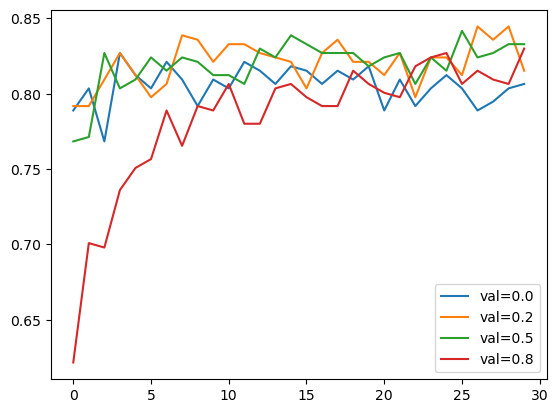

In [122]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))
             
plt.legend()

Zoom it

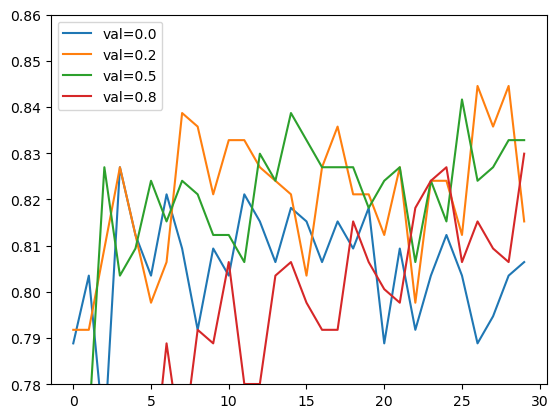

In [123]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))
             

plt.ylim(0.78, 0.86)
plt.legend()

#### Selecting the best droprate

In [124]:
droprate = 0.2

## 8.10 Data augmentation

- Different data augmentation 
- Training a model with augmentations 
- How to select data augmentation? 

We don't need to implement it manually, we can use ImageDataGenerator for that

In [125]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [126]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )
    
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 28s 257ms/step - loss: 1.2933 - accuracy: 0.5737 - val_loss: 0.7674 - val_accuracy: 0.7302
Epoch 2/50
96/96 [==============================] - 24s 248ms/step - loss: 0.9064 - accuracy: 0.6910 - val_loss: 0.7311 - val_accuracy: 0.7419
Epoch 3/50
96/96 [==============================] - 24s 248ms/step - loss: 0.7993 - accuracy: 0.7298 - val_loss: 0.7153 - val_accuracy: 0.7537
Epoch 4/50
96/96 [==============================] - 24s 249ms/step - loss: 0.7144 - accuracy: 0.7549 - val_loss: 0.6347 - val_accuracy: 0.7801
Epoch 5/50
96/96 [==============================] - 24s 250ms/step - loss: 0.6394 - accuracy: 0.7790 - val_loss: 0.6159 - val_accuracy: 0.7889
Epoch 6/50
96/96 [==============================] - 24s 249ms/step - loss: 0.6070 - accuracy: 0.7907 - val_loss: 0.6306 - val_accuracy: 0.7918
Epoch 7/50
96/96 [==============================] - 24s 248ms/step - loss: 0.5471 - accuracy: 0.8181 - val_loss: 0.5911 - val_accuracy: 0.8035

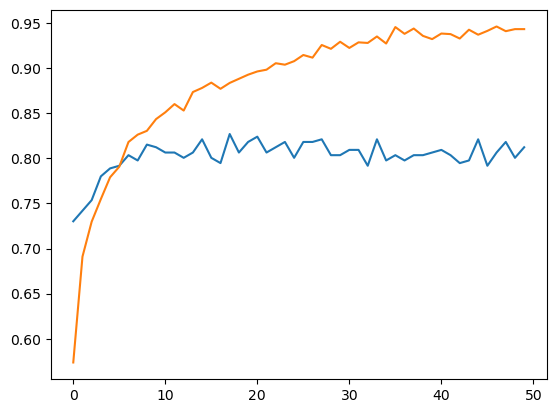

In [128]:
hist = history.history 

plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

### 8.11 Training a larger model
- Train a 299x299 model

In [129]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet',
                  include_top=False, # to create custom dense layer
                  input_shape=(input_size,input_size,3))

    base_model.trainable = False
    
    ########################################
    
    inputs = keras.Input(shape=(input_size, input_size,3))
    base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) # adding additional Dense Layer
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #######################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without applying softmax

    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy']) # evaluation metric accuracy
    return model

#### Augmentation

In [130]:
input_size = 299

In [131]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


#### Checkpoint

In [132]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max')

In [134]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
        input_size=299,
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
)
    
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 68s 674ms/step - loss: 1.0678 - accuracy: 0.6509 - val_loss: 0.5451 - val_accuracy: 0.8358
Epoch 2/50
96/96 [==============================] - 63s 656ms/step - loss: 0.6531 - accuracy: 0.7839 - val_loss: 0.4781 - val_accuracy: 0.8475
Epoch 3/50
96/96 [==============================] - 63s 652ms/step - loss: 0.5682 - accuracy: 0.8100 - val_loss: 0.4600 - val_accuracy: 0.8240
Epoch 4/50
96/96 [==============================] - 62s 646ms/step - loss: 0.5208 - accuracy: 0.8286 - val_loss: 0.4782 - val_accuracy: 0.8211
Epoch 5/50
96/96 [==============================] - 63s 655ms/step - loss: 0.4743 - accuracy: 0.8344 - val_loss: 0.4146 - val_accuracy: 0.8387
Epoch 6/50
96/96 [==============================] - 63s 657ms/step - loss: 0.4233 - accuracy: 0.8556 - val_loss: 0.4111 - val_accuracy: 0.8534
Epoch 7/50
96/96 [==============================] - 63s 654ms/step - loss: 0.4019 - accuracy: 0.8634 - val_loss: 0.4128 - val_accuracy: 0.8475

### 8.12 Using the model
- Loading the model 
- Evaluating the model 
- Getting predictions 

#### Load libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

2023-11-19 18:01:04.277998: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


#### Load a model

In [22]:
model = keras.models.load_model('xception_v4_16_0.871.h5')

#### Load a data

In [4]:
test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #shear_range=10.0,
    #zoom_range=0.1,
    #vertical_flip=True,
)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


#### Evaluate the model

In [5]:
model.evaluate(test_ds)

2023-11-19 18:02:41.622787: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-19 18:02:42.245413: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 18:02:42.245891: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 18:02:42.245928: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-19 18:02:42.246438: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 18:02:42.246533: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


12/12 [==============================] - 7s 276ms/step - loss: 0.3568 - accuracy: 0.8737


[0.3568386435508728, 0.8736559152603149]

### So accuracy on testing data - 87%

#### Let's apply it on particular image

In [23]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

In [24]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

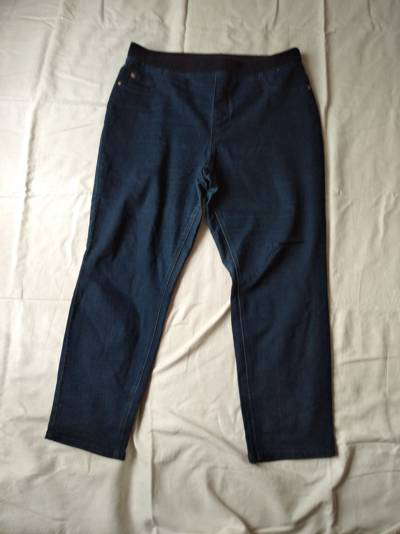

In [25]:
load_img(path)

In [26]:
img = load_img(path, target_size=(299,299))

In [27]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [28]:
X = preprocess_input(X)
X

array([[[[ 0.09803927,  0.06666672, -0.01960784],
         [ 0.10588241,  0.07450986, -0.01176471],
         [ 0.12156868,  0.09019613,  0.00392163],
         ...,
         [ 0.05098045,  0.0196079 , -0.0745098 ],
         [ 0.05882359,  0.02745104, -0.06666666],
         [-0.04313725, -0.0745098 , -0.16862744]],

        [[ 0.12156868,  0.09019613,  0.00392163],
         [ 0.13725495,  0.10588241,  0.0196079 ],
         [ 0.14509809,  0.11372554,  0.02745104],
         ...,
         [ 0.05098045,  0.0196079 , -0.0745098 ],
         [ 0.05882359,  0.02745104, -0.06666666],
         [-0.00392157, -0.03529412, -0.12941176]],

        [[ 0.13725495,  0.10588241,  0.0196079 ],
         [ 0.15294123,  0.12156868,  0.03529418],
         [ 0.16078436,  0.12941182,  0.04313731],
         ...,
         [ 0.04313731,  0.01176476, -0.08235294],
         [ 0.05882359,  0.02745104, -0.06666666],
         [ 0.02745104, -0.00392157, -0.09803921]],

        ...,

        [[ 0.20000005,  0.18431377,  0

#### Use model to make a prediction

In [29]:
pred = model.predict(X)

pred[0]

1/1 [==============================] - 1s 877ms/step


array([-4.029096  , -6.0753193 , -0.19472934, -1.8903288 , 10.2587    ,
       -1.771493  , -4.5766416 ,  3.8172765 , -2.8504395 , -4.178171  ],
      dtype=float32)

In [30]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [31]:
dict(zip(classes, pred[0]))

{'dress': -4.029096,
 'hat': -6.0753193,
 'longsleeve': -0.19472934,
 'outwear': -1.8903288,
 'pants': 10.2587,
 'shirt': -1.771493,
 'shoes': -4.5766416,
 'shorts': 3.8172765,
 'skirt': -2.8504395,
 't-shirt': -4.178171}

### Result - 'pants': 10.2587 

It's meant that our model correctly defined a class of our picture